## DCT-II 変換
$$
{X_k = \sqrt{\frac{2}{N}} C_k \sum_{n=0}^{N-1}{x_n \cos \left[ \frac{\pi}{2N} (2n+1)k \right] }
}
$$

$$
    C_k =
        \begin{cases}
            \frac{1}{\sqrt{2}} \quad k=0\\
            1 \quad k\neq0 \\
        \end{cases}
$$


## DCT-II 逆変換
$$
{x_n = \sqrt{\frac{2}{N}} \sum_{k=0}^{N-1}{C_k X_k \cos \left[ \frac{\pi}{2N} (2n+1)k \right] }
}
$$

1個飛ばし(規則性あり)で同じ値が出てくるのは何故？

ランチョスして信号の形は変わっているのに、同じ成分があることは変わらない？

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# データ数
N = 8

## 基底関数$$
\phi_k[i] = \begin{cases}
\frac{1}{\sqrt{N}}  \quad \quad \quad (k=0) \\
\sqrt{\frac{2}{N}} \cos \left({\frac{\pi}{2N}(2i+1)k}\right) \quad  (k=1,2,...,N-1) 
\end{cases}
$$

In [3]:
def T(k, N):
    if k == 0:
        return np.ones(N)/np.sqrt(N)
    else:
        return np.sqrt(2/N) * np.cos((np.pi/(2*N))*(2*np.arange(N)+1)*k)

## 基底関数の形をプロットする

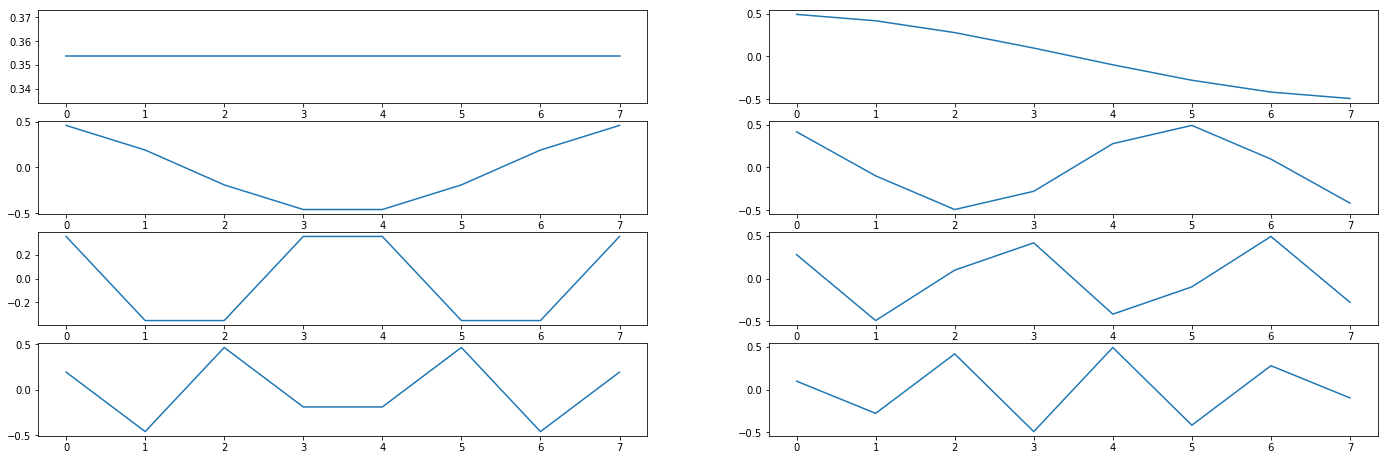

In [4]:
plt.figure(figsize=(24, 16))

N = 8
plot_num = 7

# Tの生成
T_1d = []
for k in range(0, N):
    T_1d.append(T(k, N))
T_1d = np.array(T_1d)

# Tのプロット
for k in range(0, plot_num+1):
    plt.subplot(plot_num+1, 2, k + 1)
    plt.plot(T_1d[k])

In [14]:
T_1d.shape

(16, 16)

## DCTの計算

DCTは基底関数と、データのと基底関数の積を計算することで求める $c = Tx$

np.dotで内積の計算、もしくは行列積の計算(T:行列,x:ベクトル)

一次元配列同士の内積は、要素数があっていれば計算ができます。

転置とかいらない これって行列積の計算のやつか、内積は要素数が同じやったらいける

要素が異なる？片一方がベクトルの場合は、右側からベクトルをかける場合、このベクトルは、列ベクトルだと解釈される。

計算結果は行ベクトル

In [5]:
# 一次元のDCT変換
def dct_1d(x):
    T_1d = []
    for k in range(N):
        T_1d.append(T(k, N))
    T_1d = np.array(T_1d)
    return T_1d.dot(x), T_1d

## ランダムな配列を作成

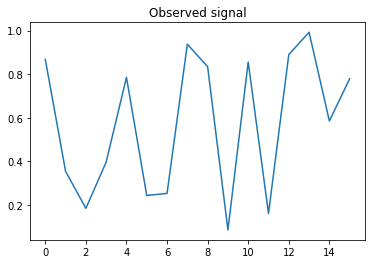

In [61]:
x = np.random.rand(N*2)
plt.title('Observed signal')
plt.plot(x)

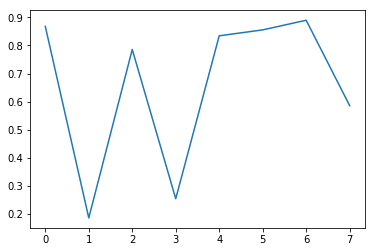

In [62]:
plt.plot(x[::2])

## 1次元のDCTを計算

<StemContainer object of 3 artists>

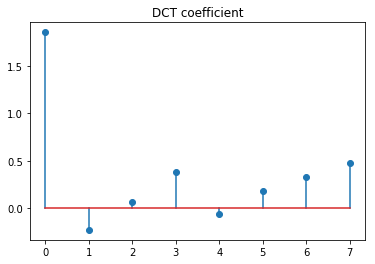

In [63]:
c, T_1d = dct_1d(x[::2])
plt.title('DCT coefficient')
plt.stem(c)

In [64]:
c.shape

(8,)

In [65]:
# 内積の計算
N_1 = 1/np.sqrt(N)
s = 0.0
for n in x[::2]:
    s += N_1 * n
s

1.858780504413879

In [66]:
N = N*2

<StemContainer object of 3 artists>

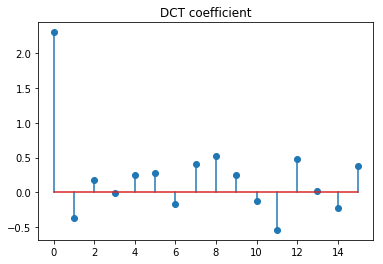

In [67]:
c, T_1d = dct_1d(x)
plt.title('DCT coefficient')
plt.stem(c)

## 直交行列
直交行列は、
$
\boldsymbol{A}^T = \boldsymbol{A}^{-1}
$
となるような行列のこと。

## IDCT
基底関数は直交行列であり、その性質を用いれば、DCT係数が$c=Tx$で与えられたことから
$$
\begin{align*}
c &= Tx\\
T^{-1}c &= T^{-1}Tx\\
T^{-1}c &= x\\
x &= T^Tc
\end{align*}
$$
で求められる。行列積...じゃない計算してる

In [68]:
# なんかアスタリスクで計算すると要素ごとの計算になる
temp = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
tempp = np.array([1,2,3])
temp * tempp

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

基底関数の行列

| 1   | 2   | 3   | 4   | 5   |
|-----|-----|-----|-----|-----|
| f00 | f01 | f02 | f03 | f04 |
| f10 | f11 | f12 | f13 | f14 |
| f20 | f21 | f22 | f23 | f24 |
| f30 | f31 | f32 | f33 | f34 |
| f40 | f41 | f42 | f43 | f44 |

信号

| 1  | 2  | 3  | 4  | 5  |
|----|----|----|----|----|
| x0 | x1 | x2 | x3 | x4 |

DCTの計算では、信号は行ベクトルを列ベクトルだと解釈されて積の計算が行われる。

DCT係数

| 1  | 2  | 3  | 4  | 5  |
|----|----|----|----|----|
| c0 | c1 | c2 | c3 | c4 |

基底関数の行列の転置(逆行列)

| 1   | 2   | 3   | 4   | 5   |
|-----|-----|-----|-----|-----|
| f00 | f10 | f20 | f30 | f40 |
| f01 | f11 | f21 | f31 | f41 |
| f02 | f12 | f22 | f32 | f42 |
| f03 | f13 | f23 | f33 | f43 |
| f04 | f14 | f24 | f34 | f44 |

IDCTの場合は、要素ごとの計算をした後、列で足し合わせる

In [69]:
T_1d.T.shape

(16, 16)

In [70]:
c.shape

(16,)

In [71]:
(T_1d.T * c).shape

(16, 16)

In [72]:
# 一次元のDCT逆変換
def idct_1d(T, c):
    return np.sum(T_1d.T * c, axis=1)

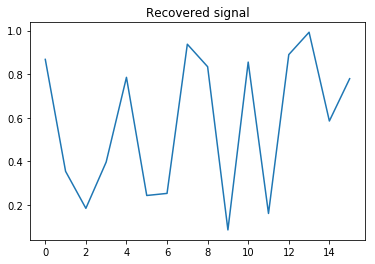

In [73]:
y = idct_1d(T_1d, c)
plt.title('Recovered signal')
plt.plot(y)

## 重ねて表示して一致することを見てみる

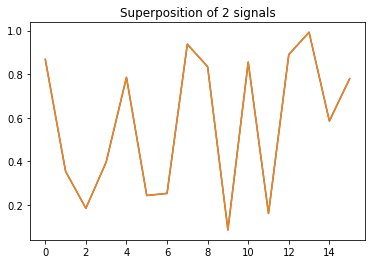

In [74]:
plt.title('Superposition of 2 signals')
plt.plot(x)
plt.plot(y)

# DCT係数を予想してみる

## 高周波は全て0だったとする

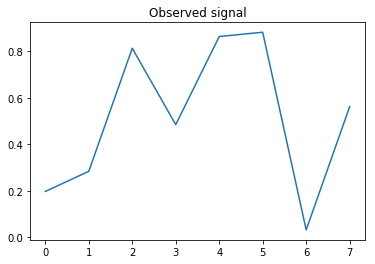

In [75]:
N=8
x = np.random.rand(N)
plt.title('Observed signal')
plt.plot(x)

<StemContainer object of 3 artists>

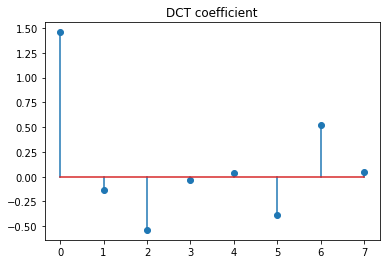

In [76]:
c, T_1d = dct_1d(x)
plt.title('DCT coefficient')
plt.stem(c)

In [77]:
cp = np.append(c,np.zeros(8))

<StemContainer object of 3 artists>

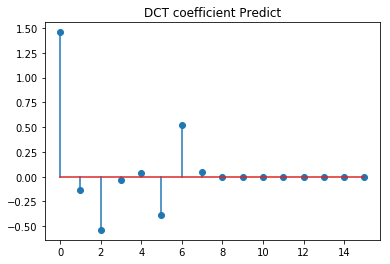

In [78]:
plt.title('DCT coefficient Predict')
plt.stem(cp)

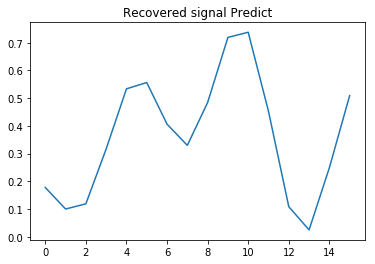

In [79]:
# IDCT用に16点での基底関数を用意しておく
N = 16
# Tの生成
T_1d = []
for k in range(0, N):
    T_1d.append(T(k, N))
T_1d = np.array(T_1d)

y = idct_1d(T_1d, cp)
plt.title('Recovered signal Predict')
plt.plot(y)

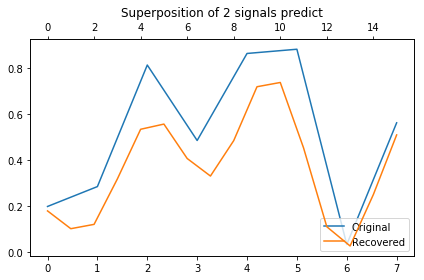

In [85]:
fig = plt.figure()
xx = np.arange(0,1,0.1)

ax1 = fig.add_subplot(111)
ln1 = ax1.plot(x,"C0",label="Original")

ax2 = ax1.twiny()
ln2 = ax2.plot(y,"C1",label="Recovered")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right')

plt.title('Superposition of 2 signals predict')
plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。

おおまかな形はあるけど、崩れる？
最大値(?)も小さくなってる

## 高周波が全てNだとする

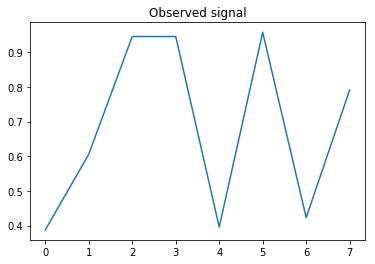

In [30]:
N=8
x = np.random.rand(N)
plt.title('Observed signal')
plt.plot(x)

<StemContainer object of 3 artists>

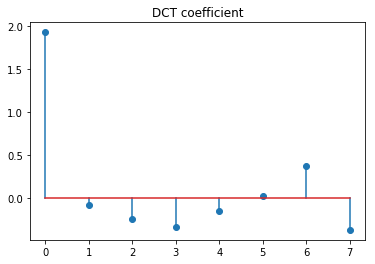

In [31]:
c, T_1d = dct_1d(x)
plt.title('DCT coefficient')
plt.stem(c)

<StemContainer object of 3 artists>

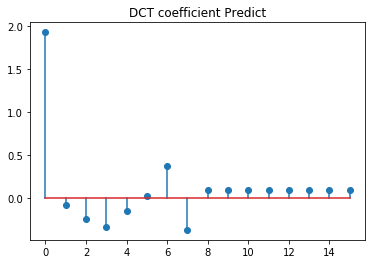

In [34]:
cp = np.append(c,np.full(8,0.1))  # DCTの高周波予想値
plt.title('DCT coefficient Predict')
plt.stem(cp)

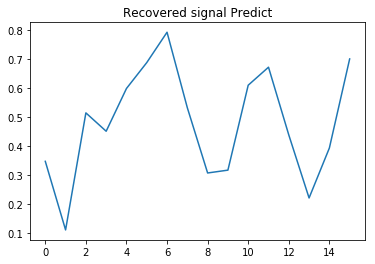

In [35]:
# IDCT用に16点での基底関数を用意しておく
N = 16
# Tの生成
T_1d = []
for k in range(0, N):
    T_1d.append(T(k, N))
T_1d = np.array(T_1d)

y = idct_1d(T_1d, cp)
plt.title('Recovered signal Predict')
plt.plot(y)

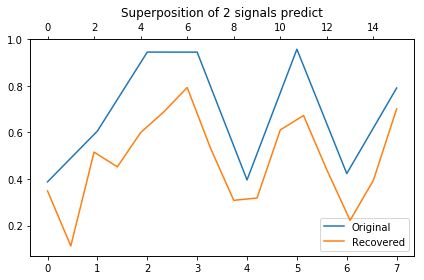

In [36]:
fig = plt.figure()
xx = np.arange(0,1,0.1)

ax1 = fig.add_subplot(111)
ln1 = ax1.plot(x,"C0",label="Original")

ax2 = ax1.twiny()
ln2 = ax2.plot(y,"C1",label="Recovered")

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right')

plt.title('Superposition of 2 signals predict')
plt.tight_layout()#グラフが重ならず，設定した図のサイズ内に収まる。

ギザギザが生まれた

周波数領域で予想するのは難しいな

# 時間領域において、線形補間したやつで比較

### 16点の信号

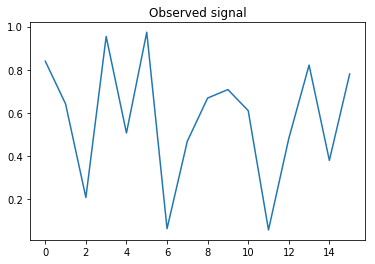

In [86]:
N=8
x_16 = np.random.rand(N*2)
plt.title('Observed signal')
plt.plot(x_16)

### 間引きして8点の信号にしておく

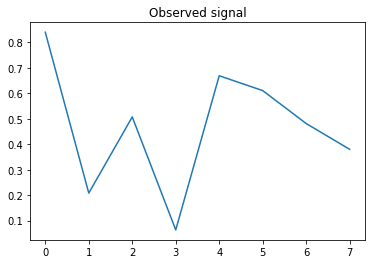

In [87]:
x_8 = x_16[::2]
plt.title('Observed signal')
plt.plot(x_8)

### 線形補間して15点の信号にする
8点の間は7個なので全部で15点

線形補間
$$
y = y_0 + (y_1 - y_0)\frac{x - x_0}{x_1 - x_0}
$$

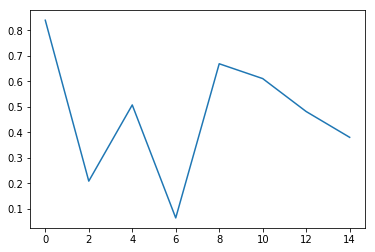

In [88]:
def lerp(x0, y0, x1, y1, x):
    return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
x_16_lerp = []
for index in range(N-1):
    x_16_lerp.append(x_8[index])
    x_16_lerp.append(lerp(index, x_8[index], index+1, x_8[index+1],index + 0.5))

x_16_lerp.append(x_8[N-1])
plt.plot(x_16_lerp)

In [89]:
len(x_16_lerp)

15

<StemContainer object of 3 artists>

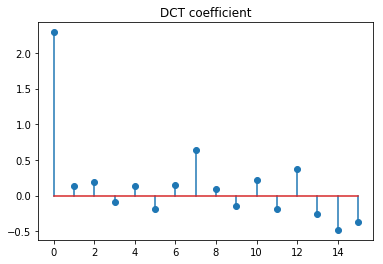

In [93]:
N = 8*2
c, T_1d = dct_1d(x_16)
plt.title('DCT coefficient')
plt.stem(c)

<StemContainer object of 3 artists>

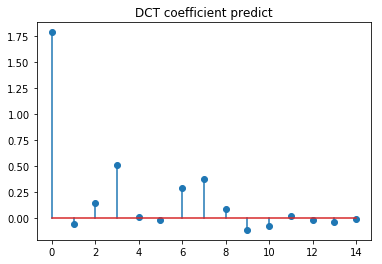

In [91]:
N=15
cp, T_1d = dct_1d(x_16_lerp)
plt.title('DCT coefficient predict')
plt.stem(cp)

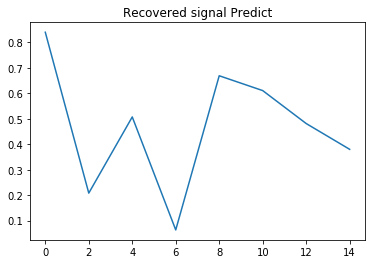

In [95]:
# IDCT用に16点での基底関数を用意しておく
N = 15
# Tの生成
T_1d = []
for k in range(0, N):
    T_1d.append(T(k, N))
T_1d = np.array(T_1d)

y = idct_1d(T_1d, cp)
plt.title('Recovered signal Predict')
plt.plot(y)

ランダムな信号には高周波成分があるので、そこをうまく表現できないとダメっぽい
画像だと予測がどう変化するのか見てみる